# TP de IBD - Dota 2

# Table of Contents
1. [Diagrama entidade-relacionamento](#Diagrama-entidade-relacionamento)
2. [Esquema relacional](#Esquema-relacional)
3. [Dados](#Dados)
4. [Criação do banco de dados](#Criação-do-BD)
5. [Inserção dos dados](#Inserção-dos-dados)
6. [Consultas realizadas](#Consultas-realizadas)
    * [Seleção e projeção](#Seleção-e-projeção)
        * [Posição das wards colocadas pelos jogadores](#Consulta:-Posição-das-wards-colocadas-pelos-jogadores)
        * [Posição nas lanes de acordo com cada time em uma partida específica](#Consulta:-Posição-nas-lanes-de-acordo-com-cada-time-em-uma-partida-específica)
   
    * [Junção de duas relações](#Junção-de-duas-relações)
        * [Saldo de kills e resultado das partidas - Junção de duas relações](#Consulta:-Saldo-de-kills-e-resultado-das-partidas)
        * [Quantidade de mensagens ao longo da partida](#Consulta:-Quantidade-de-mensagens-ao-longo-da-partida)

# Especificação

https://homepages.dcc.ufmg.br/~mirella/DCC011/aula19-TPfinal.pdf

### Itens a serem apresentados:

* ✔️Diagrama entidade-relacionamento
    * ✔️Pelo menos 4 tipos de entidade, cada tipo com ao menos 2 atributos (além de atributo identificador)
    * ✔️Pelo menos 3 tipos de relacionamento, ao menos um com cardinalidade M:N
        * (Match--m-<>-n--Player)
    * ✔️Pode ser necessário alterar os dados originais para atender a esses requisitos
* ✔️Esquema relacional
* ✔️Dados inseridos
* Consultas realizadas
    * Deverão ser especificadas e executadas um total de 10 consultas em SQL, sendo:
        * ✔️2 operações de seleção e projeção 
        * ✔️3 junção de duas relações 
        * ✔️3 junção de três ou mais relações 
        * ✔️2 funções de agregação sobre o resultado da junção de pelo menos duas relações
    * Descrição textual + comando SQL (+resultado)

### Características avançadas

* A segunda metade da avaliação deste trabalho considera **três dessas quatro** opções:

    * avaliação de eficiência das consultas (cada uma das 10 consultas especificadas é formulada de pelo menos 2 formas) 
    * ii.dados e consultas mais interessantes, com dados de tipo não-convencional
    * iii.mais três consultas do tipo relatório 
    * iv.interface gráfica (e.g., um website) para visualização interativados dados  NOTA: pontos extras se o grupo optar por realizar as quatro opções
    
### Relatório final 24/06

* O relatório final deve conter: 
    * Descrição textual do banco de dados
    * Diagramas ER e Relacional
    * Consultas realizadas com explicação textual e respectivo comando SQL
    * Descrição das atividades realizadas individualmente por participante do grupo.

**03/07**: Última chance para entregar o relatório (com possíveis correções e complementações, e.g., interface).

### Apresentação 24 e 26/06

* Cada grupo terá em torno de 10 min (a confirmar, dependendo do número de grupos) para apresentar:
    * Tema do trabalho
    * Modelagem desenvolvida (conceitual e relacional)
    * Uma seleção das várias consultas formuladas e de seus resultados, 
    * Demonstração da interface (se tiver sido desenvolvida).

![](img/dota_logo.png)

# Tema

**Escrever um pouco sobre Dota2 aqui**

Slide: https://docs.google.com/presentation/d/1JIlBqqyvB7ArYkSNUd7dRUcGuM6pP-xm3n0Gb0c_xTk/edit#slide=id.g5c6cfb5919_0_13

Dota 2 é um jogo eletrônico do gênero Multiplayer Online Battle Arena (MOBA, "arena de batalha multijogador online"), também conhecido como Action Real-Time Strategy (ARTS, "estratégia de ação em tempo real") onde o jogador controla um personagem em uma batalha entre dois times, cujo objetivo é derrotar a equipe adversária e, para isso, é, indispensavelmente, necessário destruir o Ancestral (Ancient), que, por sua vez, se localiza no centro da base inimiga. Cada base é defendida por torres e ondas de unidades (chamadas de creeps) que percorrem os caminhos principais do mapa (chamadas de trilhas, ou lanes) que levam à suas bases. Existem 3 trilhas no mapa do jogo, que por convenção são chamadas de trilha de cima (Top, atravessa a parte de cima do mapa), trilha do meio (Mid ou Middle, caminho que atravessa o centro do mapa) e trilha de baixo (Bot ou Bottom, caminho que atravessa a parte de baixo do mapa). 

Na imagem abaixo podemos ver o minimapa do Dota2 e ao lado um diagrama representando o layout de um jogo do gênero MOBA, onde os pontos roxos e rosas representam as torres de cada time, com exceção do maior ponto localizado nos cantos da imagem dentro de cada base, que representa o Ancient.

| <br><img src="img/minimaps.png" width=700px /> |
|:--:| 
| **Figura 1**: Minimapa do Dota 2 (esquerda) e layout padrão de jogos MOBA (direita) |

# Dados
Os dados foram coletados utilizando a API não oficial do jogo, chamada OpenDoTA, nela coletamos dados de várias partidas do ano de 2015, assim como os dados dos jogadores presentes em cada partida e todas as suas ações, como por exemplo as coordenadas das posições que o jogador passou durante a partida, o herói que escolheu, quantas vezes morreu, entre outros. Os dados coletados foram disponibilizados em formato json, e não em formato de tabelas como precisávamos, então foi preciso selecionar os dados que queríamos entre aqueles fornecidos pela API e montar um banco de dados a partir deles. 

Uma característica do formato json é usar o tipo de dados abstrado dicionário, que é composto de pares de chaves e valores, onde cada chave pode conter uma lista de outras chaves e seus valores, isso faz com que existam várias "sub-tabelas" nos dados, o que impossibilita a importação dos dados diretamente para um banco de dados convencional. Dessa forma, foram criadas tabelas separadas para cada conjunto de valores do json, sendo que cada tabela referencia o seu "pai" original através de chaves estrangeiras, dessa forma conseguimos manter a relação dos dados como era originalmente feito no json.

Um exemplo dos dados pode ser visto na imagem abaixo.

| ![](img/exemplo_json.png) |
|:--:| 
| **Figura 2**: Amostra dos dados coletados em formato json |

Alguns dados não podiam ser buscados através da API, como por exemplo os nomes e números identificadores de cada personagem ou item do jogo, que são informações constantes, que não mudam entre as partidas, mas precisávamos dessas informações uma vez que a maior parte dos dados é numérica, e não seria interessante ter apenas números, mas sim nomes e significados para que os dados fizessem mais sentido. Por fim encontramos esses dados também em formato json, compatíveis com os dados da API, o que fez com que ficasse mais natural a relação entre as informações.

A imagem abaixo mostra um exemplo dos dados constantes de itens do jogo, com o id e nome de cada item listado em formato json.

| ![](img/exemplo_constantes.png) | 
|:--:| 
| **Figura 3**:  Dados constantes do jogo, servem de referência para os dados das partidas |

# Criação do banco de dados

Para criar o banco de dados baseado nas informações em json, primeiro escolhemos quais partes dos dados seriam utilizadas, uma vez que a quantidade de dados é muito extensa, e ficaria inviável modelar e inserir os dados em sua totalidade em um banco de dados devido à limitações de tempo. Depois disso foi decidido o que se tornaria tabela e o que se tornaria atributo. Seguimos um padrão no qual todas as chaves do json que possuíam uma lista de valores, se tornariam tabelas, e essas tabelas seriam relacionada à tabela acima na hierarquia por meio de chaves estrangeiras. Usando como referência os dados da Figura 2, podemos ver que a parte referente aos dados da partida possui uma chave *"players"*, que por sua vez possui várias informações pontuais e tambem possui chaves com listas e outras informações. Cada uma dessas chaves que possuem mais de um valor seriam candidatas para serem transformadas em tabelas, como pode ser visto no exemplo da imagem abaixo, onde a chave referente à partida (match) possui uma chave com vários valores chamada "players", nesse caso players se tornou uma tabela separada de match, relacionada à match por uma chave estrangeira.

| ![](img/json_e_diagrama.png) |
|:--:| 
| **Figura 4**:  Recorte do diagrama e dos dados para ilustrar o mapeamento do json para banco de dados relacional |

Por fim optamos por criar 20 tabelas, que contém desde informações das ações dos jogadores em cada partida, até o nome dos heróis e itens do jogo, passando claro pelas informações das partidas como time vencedor, duração em segundos, entre outros.

# Diagrama entidade-relacionamento

Para a criação do diagrama entidade-relacionamento, utilizamos o software *brModelo*, que foi indicado pela professora em sala durante a discussão do trabalho final. O brModelo usa a notação do livro do Prof. Heuser, que é um pouco diferente da que foi vista em sala de aula, mas achamos bem intuitivo e conseguimos modelar o banco sem muitos problemas.

Abaixo podemos ver o diagrama criado para o nosso banco.

| ![](DiagramaER/diagrama_er.png) |
|:--:| 
| **Figura 5**:  Diagrama entidade-relacionamento |

# Esquema relacional

Para criar o esquema relacional, tivemos vários problemas com algumas ferramentas como o site erdplus.com, também indicado pela professora, e ao tentar utilizar ferramentas mais manuais como o site draw.io, vimos que levaria muito mais tempo do que nós tínhamos disponível. Por esse motivo, optamos por utilizar uma ferramenta mais profissional, no caso o MySQL Workbench, isso agilizou bastante o processo e nos ajudou a não cometer erros no diagrama, uma vez que essa é uma ferramenta especializada em banco de dados.

Para armazenar os dados, optamos por utilizar a biblioteca sqlite3 do python, que foi mostrada na aula ministrada pela nossa monitora, já que é mais prático manter os dados em um arquivo ao invés de utilizar um servidor MySQL. Uma limitação do MySQL Workbench era exportar o modelo apenas no padrão SQL do MySQL, e após alguns testes, vimos que esse padrão não era compatível com a sintaxe do SQLite. Para resolver esse problema, utilizamos um plugin do MySQL Workbench chamado ExportSQLite, que exporta o modelo relacional criado diretamente para código SQL compatível com SQLite.

Após feita a modelagem e criação do código em SQL para criação do banco, começamos a utilizar o Jupyter-Notebook para ler os dados dos arquivos json

| ![](ModeloER/esquema_relacional.png) |
|:--:| 
| **Figura 6**:  Esquema relacional |

# Referências

Dota 2 Wikipedia: https://en.wikipedia.org/wiki/Dota_2 <br>
MOBA: https://en.wikipedia.org/wiki/Multiplayer_online_battle_arena <br>
OpenDoTA API: https://docs.opendota.com/ <br>
Descrição dos dados: https://wiki.teamfortress.com/wiki/WebAPI/GetMatchDetails <br>
brModelo: http://www.sis4.com/brModelo/ <br>
MySQL Workbench: https://www.mysql.com/products/workbench/ <br>
Plugin do MySQL Workbench (exportar para SQLite): https://github.com/tatsushid/mysql-wb-exportsqlite <br>

# Código

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import io
import sqlite3
import json

# xaa.json tem 791 partidas
# amostra.json tem 5 partidas

# Dados

In [ ]:
with open('xaa.json', 'r', encoding="utf8") as game_data:
    json_data = json.load(game_data)

# Criação do BD

In [18]:
conn = sqlite3.connect('SQL/dota2_791_partidas.db')
cursor = conn.cursor()

In [ ]:
f = io.open('SQL/Banco_Dota2.sql', 'r')
sql = f.read()
cursor.executescript(sql)

# Inserção dos dados

In [ ]:
#Dados do lobby_type.json
with open('json/lobby_type.json') as lobby_type_json:
    lobby_type_data = json.load(lobby_type_json)
    for l_id in lobby_type_data:
        lobby_type_id = lobby_type_data[l_id]['id']
        lobby_type_name = lobby_type_data[l_id]['name']
        #print(lobby_type_id,lobby_type_name)
        #INSERT
        cursor.execute('''INSERT INTO lobby_type (id,name) VALUES(?,?)''', (lobby_type_id,lobby_type_name))

#Dados do game_mode.json
with open('json/game_mode.json') as game_mode_json:
    game_mode_data = json.load(game_mode_json)
    for g_id in game_mode_data:
        game_mode_id = game_mode_data[g_id]['id']
        game_mode_name = game_mode_data[g_id]['name']
        #print(game_mode_id,game_mode_name)
        #INSERT
        cursor.execute('''INSERT INTO game_mode (id,name) VALUES(?,?)''', (game_mode_id,game_mode_name))

#Dados do order_types.json
with open('json/order_types.json') as order_types_json:
    order_types_data = json.load(order_types_json)
    for o_id in order_types_data:
        order_type_id = o_id
        order_type_name = order_types_data[o_id]
        #print(order_type_id, order_type_name)
        #INSERT
        cursor.execute('''INSERT INTO order_types (id,name) VALUES(?,?)''', (order_type_id,order_type_name))

#Dados do gold_reasons.json
with open('json/gold_reasons.json') as gold_reasons_json:
    gold_reasons_data = json.load(gold_reasons_json)
    for gold_id in gold_reasons_data:
        gold_reasons_id = gold_id
        gold_reasons_name = gold_reasons_data[gold_id]['name']
        #print(gold_reasons_id,gold_reasons_name)
        #INSERT
        cursor.execute('''INSERT INTO gold_reasons (id,name) VALUES(?,?)''', (gold_reasons_id,gold_reasons_name))

#Dados do xp_reasons.json
with open('json/xp_reasons.json') as xp_reasons_json:
    xp_reasons_data = json.load(xp_reasons_json)
    for x_id in xp_reasons_data:
        xp_reasons_id = x_id
        xp_reasons_name = xp_reasons_data[x_id]
        #print(xp_reasons_id, xp_reasons_name)
        #INSERT
        cursor.execute('''INSERT INTO xp_reasons (id,name) VALUES(?,?)''', (xp_reasons_id,xp_reasons_name))

#Dados do item_ids.json
with open('json/item_ids.json') as item_ids_json:
    item_ids_data = json.load(item_ids_json)
    for i_id in item_ids_data:
        item_ids_id = i_id
        item_ids_name = item_ids_data[i_id]
        #print(item_ids_id, item_ids_name)
        #INSERT
        cursor.execute('''INSERT INTO item_ids (id,name) VALUES(?,?)''', (item_ids_id,item_ids_name))

#Dados do item_ids.json
with open('json/heroes.json') as heroes_json:
    heroes_data = json.load(heroes_json)
    for h_id in heroes_data:
        hero_id = heroes_data[h_id]['id']
        hero_name = heroes_data[h_id]['localized_name']
        primary_attr = heroes_data[h_id]['primary_attr']
        attack_type = heroes_data[h_id]['attack_type']
#         print(hero_id,hero_name,primary_attr,attack_type)
        cursor.execute('''INSERT INTO heroes (hero_id,localized_name,primary_attr,attack_type) 
        VALUES(?,?,?,?)''', (hero_id,hero_name,primary_attr,attack_type))

conn.commit()

In [ ]:
#cursor.execute('''INSERT INTO item_ids (,) VALUES(?,?)''', (,))
#match
for match in json_data:
    match_id                = match['match_id'] # INT CHAVE PRIMARIA
    radiant_win             = match['radiant_win'] # BOOL
    duration                = match['duration'] # INT
    tower_status_dire       = match['tower_status_dire'] # INT (binário em decimal)
    tower_status_radiant    = match['tower_status_radiant'] # INT (binário em decimal)
    barracks_status_radiant = match['barracks_status_radiant'] # INT (binário em decimal)
    barracks_status_dire    = match['barracks_status_dire'] # INT (binário em decimal)
    first_blood_time        = match['first_blood_time'] # INT
    lobby_type              = match['lobby_type'] # INT CHAVE ESTRANGEIRA
    human_players           = match['human_players'] # INT
    game_mode               = match['game_mode'] # INT
    #print(match_id, radiant_win, duration, tower_status_radiant, tower_status_dire, barracks_status_radiant, 
    #      barracks_status_dire, first_blood_time, lobby_type, human_players, game_mode)
    
    # INSERT tudo_isso_em_cima INTO match (SQL)
    cursor.execute('''INSERT INTO match (match_id,game_mode, lobby_type, radiant_win, duration, 
    human_players, tower_status_dire, tower_status_radiant, barracks_status_radiant,
    barracks_status_dire, first_blood_time) VALUES(?,?,?,?,?,?,?,?,?,?,?)''',
                   (match_id,game_mode, lobby_type, radiant_win, duration, human_players, tower_status_dire, 
                    tower_status_radiant, barracks_status_radiant, barracks_status_dire, first_blood_time))
    
#chat        
    for chat_message in match['chat']:
        #chat_id = AUTO_INCREMENT # CHAVE PRIMARIA
        chat_match_id = match_id # CHAVE ESTRANGEIRA DE MATCH
        time  = chat_message['time']
        type_ = chat_message['type']
        unit  = chat_message['unit']
        key   = chat_message['key']
        slot  = chat_message['slot']
        #print(chat_match_id, time, type_, unit, key, slot)
        
        # INSERT tudo_isso_em_cima INTO chat
        cursor.execute('''INSERT INTO chat (chat_match_id,ROWID,time,type,unit,key,slot) VALUES(?,?,?,?,?,?,?)''', 
                       (chat_match_id,None,time,type_,unit,key,slot))
    
    for player in match['players']:
        player_match_id = match_id # CHAVE ESTRANGEIRA DE MATCH
        player_slot   = player['player_slot']
        level         = player['level']
        hero_healing  = player['hero_healing']
        leaver_status = player['leaver_status']
        last_hits     = player['last_hits']
        denies        = player['denies']
        gold_per_min  = player['gold_per_min']
        gold_spent    = player['gold_spent']
        gold          = player['gold']
        xp_per_min    = player['xp_per_min']
        hero_id       = player['hero_id']
        hero_damage   = player['hero_damage']
        tower_damage  = player['tower_damage']
        kills         = player['kills']
        deaths        = player['deaths']
        assists       = player['assists']
        item_0        = player['item_0']
        item_1        = player['item_1']
        item_2        = player['item_2']
        item_3        = player['item_3']
        item_4        = player['item_4']
        item_5        = player['item_5']
        
        # Ignorar os Bots (tem account_id = None)
        account_id    = player['account_id']
        if account_id is None: continue 
            
#         print(player_match_id,player_slot,gold_spent,gold,xp_per_min,level,hero_id,
#         hero_healing,hero_damage,leaver_status,tower_damage,last_hits,kills,denies,deaths,gold_per_min,
#         item_0,item_1,item_2,item_3,item_4,item_5,assists)
        #INSERT
        cursor.execute('''INSERT INTO player (player_match_id,gold_spent,gold,xp_per_min,level,hero_id,
        hero_healing,hero_damage,leaver_status,tower_damage,last_hits,kills,denies,deaths,gold_per_min,
        item_0,item_1,item_2,item_3,item_4,item_5,assists,player_slot) 
        VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)''', 
                       (player_match_id,gold_spent,gold,xp_per_min,level,hero_id,
        hero_healing,hero_damage,leaver_status,tower_damage,last_hits,kills,denies,deaths,gold_per_min,
        item_0,item_1,item_2,item_3,item_4,item_5,assists,player_slot))
        
        for action in player['actions']:
            action_match_id = match_id # CHAVE ESTRANGEIRA DE MATCH
            action_player_slot = player_slot # CHAVE ESTRANGEIRA DE PLAYER
            action_id = action # CHAVE ESTRANGEIRA DO ORDER_TYPES
            action_count = player['actions'][action]
            #print(actions_match_id, action_account_id, action_id, action_count)
            # INSERT tudo_isso_em_cima INTO actions
            cursor.execute('''INSERT INTO actions (action_match_id,action_player_slot,action_id,action_count) 
            VALUES(?,?,?,?)''', (action_match_id,action_player_slot,action_id,action_count))
            
        for x_coord in player['lane_pos']:
            for y_coord in player['lane_pos'][x_coord]:
                pos_match_id = match_id
                pos_player_slot = player_slot
                x_pos = x_coord
                y_pos = y_coord
                pos_count = player['lane_pos'][x_coord][y_coord]
                #print(pos_match_id, pos_account_id, x_coord, y_coord, player['lane_pos'][x_coord][y_coord])
                
                # INSERT tudo_isso_em_cima INTO lane_pos
                cursor.execute('''INSERT INTO lane_pos (pos_match_id,pos_player_slot,x_pos,y_pos,pos_count)
                VALUES(?,?,?,?,?)''', (pos_match_id,pos_player_slot,x_pos,y_pos,pos_count))
                
        for x_coord in player['obs']:
            for y_coord in player['obs'][x_coord]:
                obs_match_id  = match_id
                obs_player_slot = player_slot
                x_pos         = x_coord
                y_pos         = y_coord
                obs_count     = player['obs'][x_coord][y_coord]
                #print(obs_match_id, obs_account_id, x_pos, y_pos, obs_count)
                
                # INSERT tudo_isso_em_cima INTO obs
                cursor.execute('''INSERT INTO obs (obs_match_id,obs_player_slot,x_pos,y_pos,obs_count)
                VALUES(?,?,?,?,?)''', (obs_match_id,obs_player_slot,x_pos,y_pos,obs_count))
        
        for x_coord in player['sen']:
            for y_coord in player['sen'][x_coord]:
                sen_match_id  = match_id
                sen_player_slot = player_slot
                x_pos         = x_coord
                y_pos         = y_coord
                sen_count     = player['sen'][x_coord][y_coord]
                #print(sen_match_id, sen_account_id, x_pos, y_pos, sen_count)
                
                # INSERT tudo_isso_em_cima INTO sen
                cursor.execute('''INSERT INTO sen (sen_match_id,sen_player_slot,x_pos,y_pos,sen_count)
                VALUES(?,?,?,?,?)''', (sen_match_id,sen_player_slot,x_pos,y_pos,sen_count))
                
        for player_gold_reasons in player['gold_reasons']:
            gold_match_id = match_id
            gold_player_slot = player_slot
            gold_id = player_gold_reasons # CHAVE ESTRANGEIRA DO GOLD_REASONS
            gold_count = player['gold_reasons'][gold_id]
            #print(player_gold_match_id, player_gold_account_id, player_gold_id, player_gold_count)

            # INSERT tudo_isso_em_cima INTO player_gold_reasons
            cursor.execute('''INSERT INTO player_gold_reasons (gold_match_id,gold_player_slot,
            gold_id,gold_count) 
            VALUES(?,?,?,?)''', (gold_match_id,gold_player_slot,gold_id,gold_count))
            
        for player_xp_reasons in player['xp_reasons']:
            xp_match_id = match_id
            xp_player_slot = player_slot
            xp_id = player_xp_reasons # CHAVE ESTRANGEIRA DO XP_REASONS
            xp_count = player['xp_reasons'][xp_id]
            #print(xp_match_id,xp_player_slot,xp_id,xp_count)
            #INSERT
            cursor.execute('''INSERT INTO player_xp_reasons (xp_match_id,xp_player_slot,
            xp_id,xp_count) 
            VALUES(?,?,?,?)''', (xp_match_id,xp_player_slot,xp_id,xp_count))

        for player_damage in player['damage']:
            damage_match_id = match_id
            damage_player_slot = player_slot
            unit_damaged = player_damage
            damage_count = player['damage'][unit_damaged]
            #print(damage_match_id,damage_player_slot,unit_damaged,damage_count)
            #insert into player_damage values
            cursor.execute('''INSERT INTO damage (damage_match_id,damage_player_slot,unit_damaged,damage_count) 
            VALUES(?,?,?,?)''', (damage_match_id,damage_player_slot,unit_damaged,damage_count))
        
        for player_healing in player['healing']:
            healing_match_id = match_id
            healing_player_slot = player_slot
            unit_healed = player_healing
            healing_count = player['healing'][unit_healed]
            #print(healing_match_id,healing_player_slot,unit_healed,healing_count)
            cursor.execute('''INSERT INTO healing (healing_match_id,healing_player_slot,unit_healed,healing_count) 
            VALUES(?,?,?,?)''', (healing_match_id,healing_player_slot,unit_healed,healing_count))
            
        for player_killed in player['killed']:
            killed_match_id = match_id
            killed_player_slot = player_slot
            unit_killed = player_killed
            killed_count = player['killed'][unit_killed]
            #print(killed_match_id,killed_player_slot,unit_killed,killed_count)
            cursor.execute('''INSERT INTO killed (killed_match_id,killed_player_slot,unit_killed,killed_count) 
            VALUES(?,?,?,?)''', (killed_match_id,killed_player_slot,unit_killed,killed_count))
        
        for item_uses in player['item_uses']:
            item_match_id = match_id
            item_player_slot = player_slot
            item_name = item_uses
            item_count = player['item_uses'][item_name]
            #print(item_match_id,item_player_slot,item_name,item_count)
            #insert
            cursor.execute('''INSERT INTO item_uses (item_match_id,item_player_slot,item_name,item_count) 
            VALUES(?,?,?,?)''', (item_match_id,item_player_slot,item_name,item_count))

conn.commit()

# Consultas realizadas

## Seleção e projeção

### Consulta: Quantidade de mensagens ao longo da partida

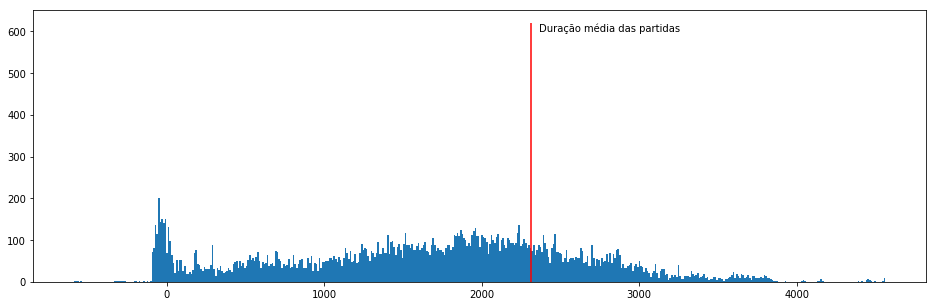

chat_match_id  time
21384     2001309152  2198
21385     2001309152  2199
21386     2001309014    54
21387     2001309014   605
21388     2001309014  1670

In [5]:
df_chat = pd.read_sql_query(
'''
SELECT chat_match_id, time
FROM chat
''', conn)

df_match_duration = pd.read_sql_query(
'''
SELECT AVG(duration)
FROM match
''', conn)

df_match_duration = df_match_duration.iloc[0][0]

# df_chat
# df_chat['time'].hist(bins=500, figsize = (16,5))
plt.figure(figsize=(16,5))
plt.hist(df_chat['time'], bins=500)
plt.vlines(df_match_duration, 0, 620, color='red')
plt.text(df_match_duration+50, 600, 'Duração média das partidas')
plt.show()
df_chat.tail()

### Consulta: Posição das wards colocadas pelos jogadores

In [6]:
df_obs = pd.read_sql_query(
'''
SELECT x_pos x, y_pos y, sum(obs_count) count 
FROM obs 
GROUP BY x_pos, y_pos
''', conn)


x    y  count
0  66  132      1
1  68  130      1
2  68  132      3
3  72   84      1
4  72   94      1

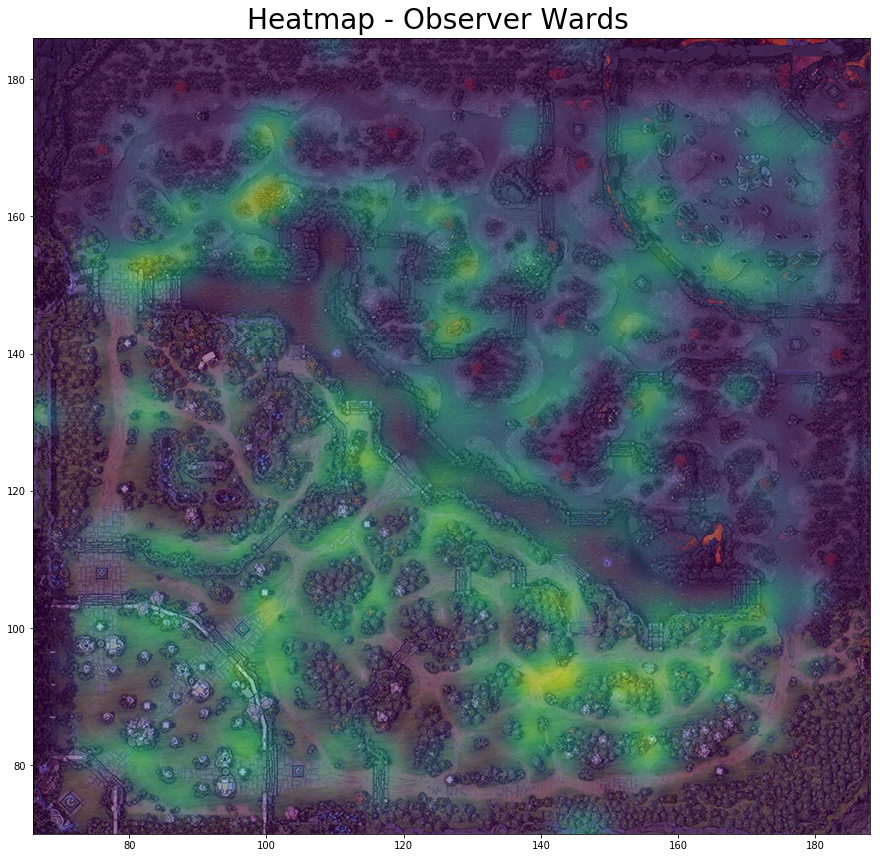

In [7]:
def dota2_heatmap(df, df_img, sizex, sizey, bins, name, title_height):
    img = plt.imread("Minimap_6.88.jpg")
    fig, ax = plt.subplots(figsize=(sizex,sizey))
    fig.suptitle(name, fontsize=28, y=title_height)
    ax.imshow(img, extent=[df_img['x'].min(), df_img['x'].max(), df_img['y'].min(), df_img['y'].max()])
    heatmap, xedges, yedges = np.histogram2d(df['x'], df['y'], bins=bins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    ax.imshow(heatmap.T, extent=extent, origin='lower', alpha=0.5, interpolation='bicubic')


dota2_heatmap(df_obs, df_obs, 15, 15, 35, 'Heatmap - Observer Wards', 0.9)
df_obs.head()

### Consulta: Posição nas lanes de acordo com cada time em uma partida específica

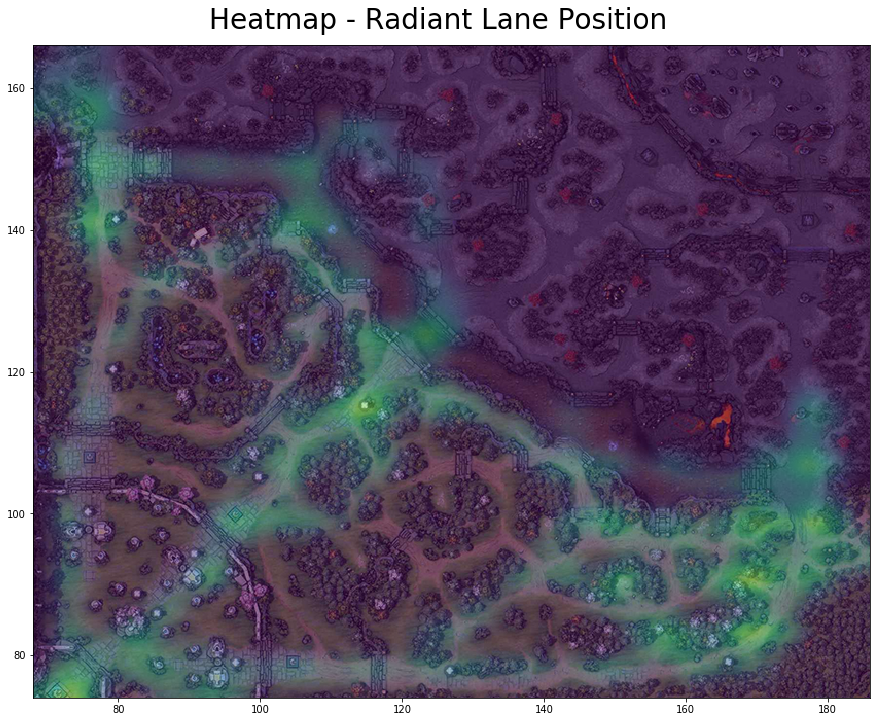

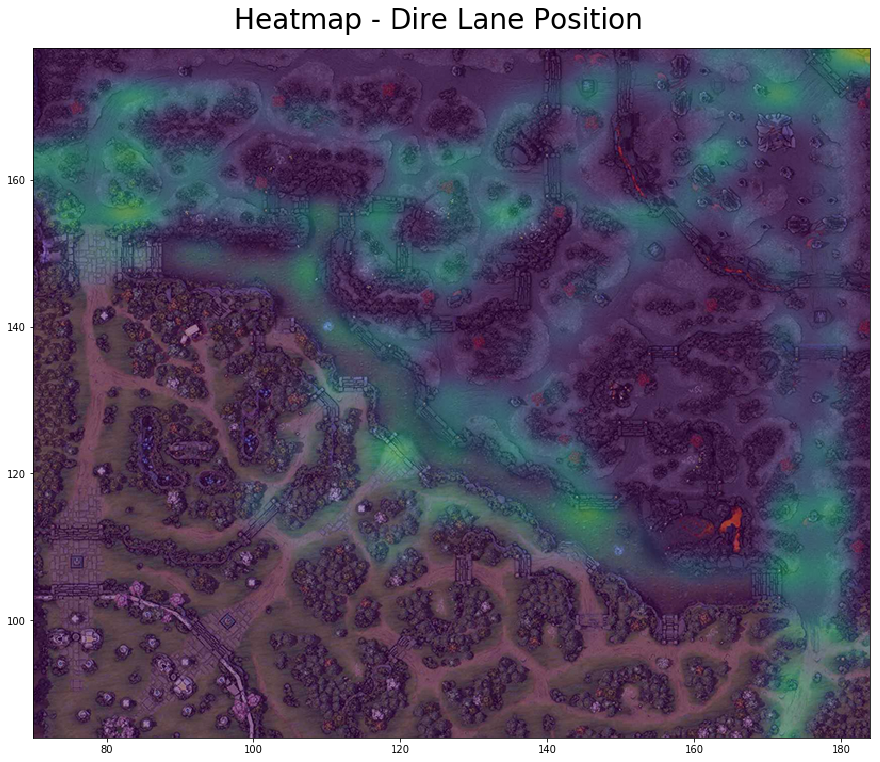

In [8]:
df_lane_radiant = pd.read_sql_query(
'''
SELECT x_pos x, y_pos y, sum(pos_count) count
FROM lane_pos 
WHERE pos_player_slot < 5 AND pos_match_id = 2001310590
GROUP BY x_pos, y_pos
''', conn)

dota2_heatmap(df_lane_radiant, df_obs, 15, 15, 35, 'Heatmap - Radiant Lane Position', 0.84)

df_lane_dire = pd.read_sql_query(
'''
SELECT x_pos x, y_pos y, sum(pos_count) count
FROM lane_pos 
WHERE pos_player_slot > 127 AND pos_match_id = 2001310590
GROUP BY x_pos, y_pos
''', conn)


dota2_heatmap(df_lane_dire, df_obs, 15, 15, 35, 'Heatmap - Dire Lane Position', 0.86)

## Junção de duas relações

### Consulta: Saldo de kills e resultado das partidas

In [9]:
df_radiant = pd.read_sql_query(
'''
SELECT REPLACE(REPLACE(radiant_win,0,"Derrota"),1,"Vitória") Resultado , (AVG(kills) - AVG(deaths)) "Saldo de Vítimas", 
AVG(hero_healing), AVG(tower_damage), AVG(hero_damage), AVG(gold_per_min), AVG(gold_spent), AVG(xp_per_min), AVG(denies), AVG(last_hits), AVG(level)
FROM match AS M
INNER JOIN(
    SELECT player_match_id, player_slot, kills, deaths, hero_healing, tower_damage, hero_damage, gold_per_min, xp_per_min, denies, last_hits, level, gold_spent
    FROM player
    WHERE player_slot < 5
) AS P
ON M.match_id = P.player_match_id
GROUP BY Resultado
ORDER BY Resultado DESC
''', conn)

# plt.scatter(df_radiant['resultado'], df_radiant['saldo_de_vitimas'], alpha=0.1)
df_radiant

Resultado  Saldo de Vítimas  AVG(hero_healing)  AVG(tower_damage)  \
0   Vitória          2.805276         590.573621        1999.218225   
1   Derrota         -3.648925         322.141398         371.974731   

   AVG(hero_damage)  AVG(gold_per_min)  AVG(gold_spent)  AVG(xp_per_min)  \
0      12477.882974         469.933333     14944.407674       485.431655   
1       9850.920430         333.937634     10818.362903       371.886559   

   AVG(denies)  AVG(last_hits)  AVG(level)  
0     4.947242      122.921343   17.993765  
1     4.249462      107.705376   15.920968

### Consulta: Quais são os itens mais usados no jogo?

In [10]:
df_mais_comprado = pd.read_sql_query(
'''
SELECT name, sum(item_count) total
FROM item_uses AS USES
INNER JOIN (
    SELECT name
    FROM item_ids
) AS IDS
ON USES.item_name = IDS.name
GROUP BY USES.item_name
ORDER BY total DESC
''', conn)

df_mais_comprado.head()

name   total
0   phase_boots  118648
1        bottle  105619
2         blink   52510
3      tpscroll   49264
4  power_treads   48492

### Consulta: Ordem dos itens mais usados no jogo

In [11]:
df_actions = pd.read_sql_query(
'''
SELECT name, sum(action_count) action_count
FROM actions AS A
INNER JOIN(
    SELECT name, id
    FROM order_types
) AS O
ON A.action_id = O.id
GROUP BY name
ORDER BY action_count DESC
''', conn)

df_actions.head()

name  action_count
0  DOTA_UNIT_ORDER_MOVE_TO_POSITION      30462690
1     DOTA_UNIT_ORDER_ATTACK_TARGET       4448451
2    DOTA_UNIT_ORDER_CAST_NO_TARGET       1019631
3    DOTA_UNIT_ORDER_MOVE_TO_TARGET        641410
4     DOTA_UNIT_ORDER_HOLD_POSITION        592617

## Junção de três ou mais relações

### Consulta: Número de vitórias por herói

In [12]:
df_winner_heroes = pd.read_sql_query(
'''
SELECT localized_name 'Hero Name', CAST(count(radiant_win) AS float)/CAST(M.num_matches AS float) WinRate
FROM match
INNER JOIN(
    SELECT player_match_id, localized_name, num_matches
    FROM player P
    INNER JOIN(
        SELECT hero_id, localized_name, num_matches
        FROM heroes
        INNER JOIN(
            SELECT hero_id n_id, count(hero_id) num_matches
            FROM player AS NUMPfor
            GROUP BY hero_id
        ) AS NUMP
        ON heroes.hero_id = NUMP.n_id
    ) AS H
    ON P.hero_id = H.hero_id
    WHERE player_slot < 5
) AS M
ON match_id = player_match_id
WHERE M.num_matches > 100
GROUP BY localized_name
ORDER BY WinRate DESC
''', conn)

df_winner_heroes.head(20)

Hero Name   WinRate
0      Vengeful Spirit  0.626168
1            Alchemist  0.594203
2        Winter Wyvern  0.570248
3     Legion Commander  0.566929
4           Gyrocopter  0.565217
5       Crystal Maiden  0.532110
6           Juggernaut  0.530864
7              Invoker  0.528409
8               Dazzle  0.527607
9         Witch Doctor  0.527273
10             Slardar  0.514706
11       Queen of Pain  0.511628
12                Tusk  0.509091
13        Shadow Fiend  0.503906
14        Ember Spirit  0.496503
15  Ancient Apparition  0.495575
16         Earthshaker  0.493333
17      Spirit Breaker  0.485981
18               Pudge  0.468085
19          Windranger  0.463830

### Consulta: Herói mais escolhido em partidas rankeadas

In [13]:
df_most_picked_ranked = pd.read_sql_query(
'''
SELECT mode_name Modo, HR.hero_name Herói, count(HR.hero_name) Aparições
FROM match AS M
INNER JOIN(
    SELECT id, name mode_name 
    FROM lobby_type
    WHERE name = 'lobby_type_ranked'
) AS L
ON M.lobby_type = L.id
INNER JOIN(
    SELECT player_match_id, hero_id, hero_name
    FROM player AS P
    INNER JOIN(
        SELECT hero_id id, localized_name hero_name
        FROM heroes
    )AS H
    ON P.hero_id = H.id
)as HR
ON M.match_id = HR.player_match_id
GROUP BY HR.hero_name
ORDER BY Aparições DESC
''', conn)

df_most_picked_ranked.head()

Modo         Herói  Aparições
0  lobby_type_ranked    Windranger        143
1  lobby_type_ranked  Shadow Fiend        135
2  lobby_type_ranked       Slardar         93
3  lobby_type_ranked       Invoker         87
4  lobby_type_ranked   Earthshaker         86

### Consulta: Last hits e Denies por Herói

In [14]:
df = pd.read_sql_query(
'''
SELECT localized_name, sum(last_hits)/count(localized_name) total_last_hits, sum(denies)/count(localized_name) total_denies
FROM match AS M
INNER JOIN(
    SELECT id, name mode_name 
    FROM lobby_type
    WHERE name = 'lobby_type_ranked'
) AS L
ON M.lobby_type = L.id
INNER JOIN(
    SELECT player_match_id, localized_name, last_hits, denies
    FROM player P
    INNER JOIN(
        SELECT hero_id id ,localized_name
        FROM heroes
    ) AS H
    ON P.hero_id = H.id
) AS M
ON match_id = player_match_id
GROUP BY localized_name
ORDER BY total_last_hits DESC
''', conn)

df.head()

localized_name  total_last_hits  total_denies
0     Lone Druid              272             6
1         Medusa              271             8
2      Anti-Mage              253             9
3      Alchemist              239             3
4   Shadow Fiend              235            13

### Consulta: Proporção de Vítimas e Assistencias por Mortes por Herói

In [15]:
df_kda = pd.read_sql_query(
'''
SELECT hero_name 'Hero Name', sum(kills) Kills, sum(assists) Assists, sum(deaths) Deaths, (CAST(sum(kills) AS float)+CAST(sum(assists) AS float))/CAST(sum(deaths) AS float) "KDA Ratio"
FROM player AS P
INNER JOIN(
    SELECT hero_id id, localized_name hero_name
    FROM heroes
) AS H
ON P.hero_id = H.id
GROUP BY hero_id
ORDER BY "KDA Ratio" DESC
''', conn)

df_kda.head()

Hero Name  Kills  Assists  Deaths  KDA Ratio
0       Spectre    584     1074     366   4.530055
1        Weaver    352      411     217   3.516129
2          Zeus    706     1253     561   3.491979
3  Ember Spirit   1142     1615     798   3.454887
4        Medusa    314      567     267   3.299625

### Consulta: Dano médio em torres de cada herói

In [16]:
df_kda = pd.read_sql_query(
'''
SELECT hero_name "Hero Name", primary_attr "Primary Attribute", attack_type "Attack Type", AVG(tower_damage) "Average Tower Damage per Match"
FROM player AS P
INNER JOIN(
    SELECT hero_id id, localized_name hero_name, primary_attr, attack_type
    FROM heroes
)AS H
ON P.hero_id = H.id
GROUP BY hero_id
ORDER BY "Average Tower Damage per Match" DESC
''', conn)

df_kda.head(20)

Hero Name Primary Attribute Attack Type  \
0              Lycan               str       Melee   
1             Clinkz               agi      Ranged   
2         Lone Druid               agi      Ranged   
3        Drow Ranger               agi      Ranged   
4        Terrorblade               agi       Melee   
5       Shadow Fiend               agi      Ranged   
6              Meepo               agi       Melee   
7      Death Prophet               int      Ranged   
8         Juggernaut               agi       Melee   
9               Luna               agi      Ranged   
10     Troll Warlord               agi      Ranged   
11              Tiny               str       Melee   
12            Medusa               agi      Ranged   
13        Windranger               int      Ranged   
14  Nature's Prophet               int      Ranged   
15  Templar Assassin               agi      Ranged   
16         Anti-Mage               agi       Melee   
17         Alchemist               str       Melee   
18     Shadow Shaman               int      Ranged   
19  Legion Commander               str       Melee   

    Average Tower Damage per Match  
0                      3995.241379  
1                      3248.538462  
2                      3180.272727  
3                      3081.433962  
4                      3061.645161  
5                      2912.117188  
6                      2791.333333  
7                      2760.620690  
8                      2694.820988  
9                      2694.676471  
10                     2684.684211  
11                     2681.477273  
12                     2436.588235  
13                     2367.391489  
14                     2350.072727  
15                     2337.728395  
16                     2323.534884  
17                     2181.347826  
18                     2175.044118  
19                     2008.496063